<h1 align='center'>Principle Component Analysis </h1>

# Table of Contents

1. <a href='#1'>Dimensionality Reduction</a>
    2. <a href='#2'>What is Dimensionality reduction?</a>
    2. <a href='#3'>Why Dimensionality reduction?</a>
    4. <a href='#5'>Visualization</a>
5. <a href='#6'>Principle Component Analysis</a>
    6. <a href='#7'>What is Principle Component Analysis?</a>
    7. <a href='#8'>Why Principle Component Analysis?</a>
    8. <a href='#9'>When should I use PCA?</a>
    6. <a href='#10'>Problem Formulation</a>
    7. <a href='#11'>PCA Algorithm</a>
    9. <a href='#12'>Reconstruction from Compressed Representation</a>
    10. <a href='#13'>Choosing the number of Principle Components</a>
    11. <a href='#14'>Advice for Applying PCA</a>
    12. <a href='#15'>Applications of PCA</a>
13. <a href='#16'>Implementation using Python</a>
14. <a href='#17'>Sci-kit learn Approach</a>
15. <a href='#18'>References</a>

<a id='1'></a>
<h1>1. Dimensionality Reduction</h1>

<a id='2'></a>
<h2>1.A What is Dimenionality Reduction?</h2>

* Dimensionality Reduction refers to the process of converting a set of data having vast dimensions into data with lesser dimensions ensuring that it conveys similar information concisely.
* These techniques are typically used while solving machine learning problems to obtain better features for a classification or regression task.


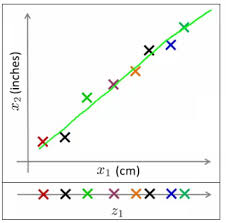

* Let’s look at the image shown above. It shows 2 dimensions x1 and x2, which are let us say measurements of several object in cm (x1) and inches (x2). 
* Now, if you were to use both these dimensions in machine learning, they will convey similar information and introduce a lot of noise in system, so you are better of just using one dimension.
* Here we have converted the dimension of data from 2D (from x1 and x2) to 1D (z1), which has made the data relatively easier to explain.

* In similar ways, we can reduce n dimensions of data set to k dimensions (k < n) . 
* These k dimensions can be directly identified (filtered) or can be a combination of dimensions (weighted averages of dimensions) or new dimension(s) that represent existing multiple dimensions well.


* One of the most common application of this technique is Image processing. You might have come across this Facebook application – **“Which Celebrity Do You Look Like?“**. 
* But, have you ever thought about the algorithm used behind this?


* Here’s the answer: To identify the matched celebrity image, we use pixel data and each pixel is equivalent to one dimension. In every image, there are high number of pixels i.e. high number of dimensions. 
* And every dimension is important here. You can’t omit dimensions randomly to make better sense of your overall data set. 
* In such cases, dimension reduction techniques help you to find the significant dimension(s) using various method(s). 

<a id='3'></a>
<h2>1.B Why Dimensionality Reduction?</h2>

* It helps in data compressing and reducing the storage space required
* It fastens the time required for performing same computations. Less dimensions leads to less computing, also less dimensions can allow usage of algorithms unfit for a large number of dimensions
* It takes care of multi-collinearity that improves the model performance. It removes redundant features. For example: there is no point in storing a value in two different units (meters and inches).
* Reducing the dimensions of data to 2D or 3D may allow us to plot and visualize it precisely. You can then observe patterns more clearly. Below you can see that, how a 3D data is converted into 2D. First it has identified the 2D plane then represented the points on these two new axis z1 and z2.

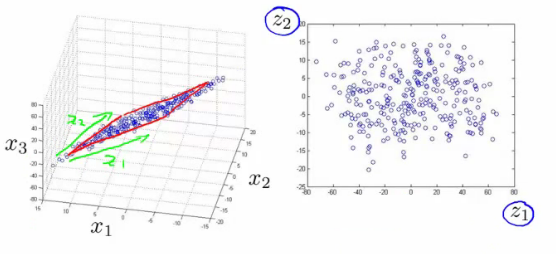

* It is helpful in noise removal also and as result of that we can improve the performance of models.

<a id='5'></a>
<h2>1.C Visualization</h2>

* It's hard to visualize highly dimensional data
    * Dimensionality reduction can improve how we display information in a tractable manner for human consumption
    * Why do we care?
        * Often helps to develop algorithms if we can understand our data better
        * Dimensionality reduction helps us do this, see data in a helpful
        * Good for explaining something to someone if you can "show" it in the data
* Example;
    * Collect a large data set about many facts of a country around the world

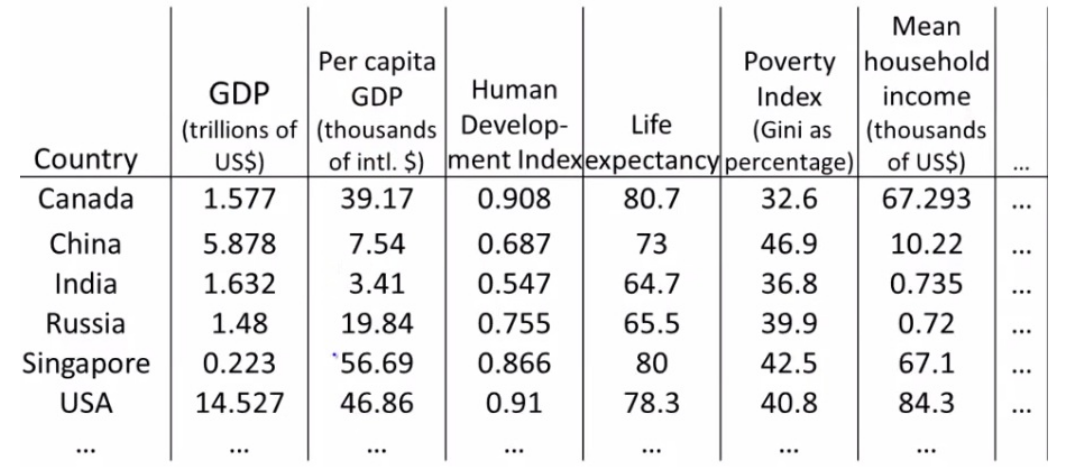

* So
    * x<sub>1</sub> = GDP
    * ...
    * x<sub>6</sub> = mean household
* Say we have 50 features per country
* How can we understand this data better?
    * Very hard to plot 50 dimensional data
* Using dimensionality reduction, instead of each country being represented by a 50-dimensional feature vector
    * Come up with a different feature representation (z values) which summarize these features

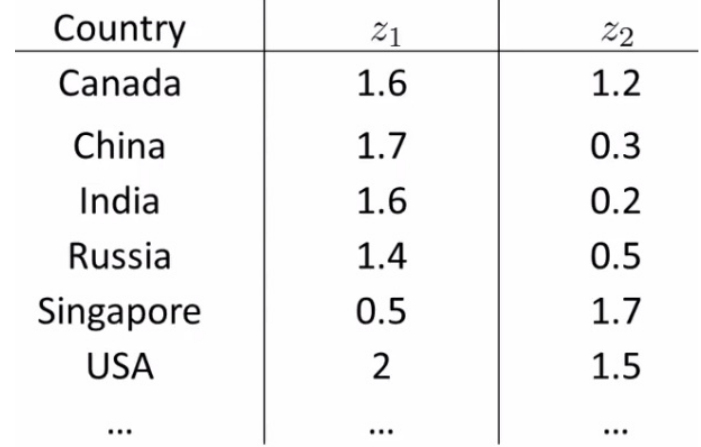

* This gives us a 2-dimensional vector
    * Reduce 50D -> 2D
    * Plot as a 2D plot
* Typically you don't generally ascribe meaning to the new features (so we have to determine what these summary values mean)
    * e.g. may find horizontal axis corresponds to overall country size/economic activity
    * and y axis may be the per-person well being/economic activity
* So despite having 50 features, there may be two "dimensions" of information, with features associated with each of those dimensions
    * It's up to you to asses what of the features can be grouped to form summary features, and how best to do that (feature scaling is probably important)
* Helps show the two main dimensions of variation in a way that's easy to understand

<a id='6'></a>
<h1>Principle Component Analysis</h2>

<a id='7'></a>
<h2>What is Principle Component Analysis?</h2>

* Principal Component Analysis (PCA) is a dimensionality reduction technique used to transform high-dimensional datasets into a dataset with fewer variables, where the set of resulting variables explains the maximum variance within the dataset.
* PCA is used prior to unsupervised and supervised machine learning steps to reduce the number of features used in the analysis, thereby reducing the likelihood of error.

* In simple words, principal component analysis is a method of extracting important variables (in form of components) from a large set of variables available in a data set. 
* It extracts low dimensional set of features from a high dimensional data set with a motive to capture as much information as possible.
* With fewer variables, visualization also becomes much more meaningful. PCA is more useful when dealing with 3 or higher dimensional data.

* It is always performed on a symmetric correlation or covariance matrix. This means the matrix should be numeric and have standardized data.



<a id='8'></a>
<h2>Why Principle Component Analysis?</h2>

<a id='9'></a>
<h2>When should I use PCA?</h2>

* Do you want to reduce the number of variables, but aren’t able to identify variables to completely remove from consideration?
* Do you want to ensure your variables are independent of one another?
* Are you comfortable making your independent variables less interpretable?


* If you answered “yes” to all three questions, then PCA is a good method to use. If you answered “no” to question 3, you should not use PCA.

<a id='10'></a>
<h2>Problem Formulation</h2>

* For the problem of dimensionality reduction the most commonly used algorithm is PCA
    * Here, we'll start talking about how we formulate precisely what we want PCA to do
* So
    * Say we have a 2D data set which we wish to reduce to 1D

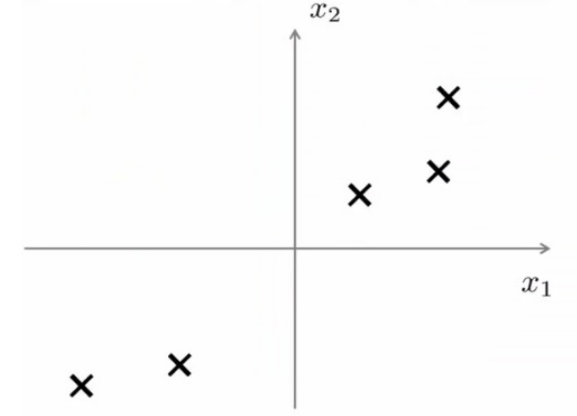

* In other words, find a single line onto which to project this data
    * How do we determine this line?
        * The distance between each point and the projected version should be small (blue lines below are short)
        * PCA tries to find a lower dimensional surface so the sum of squares onto that surface is minimized
        * The blue lines are sometimes called the projection error
            * PCA tries to find the surface (a straight line in this case) which has the minimum projection error

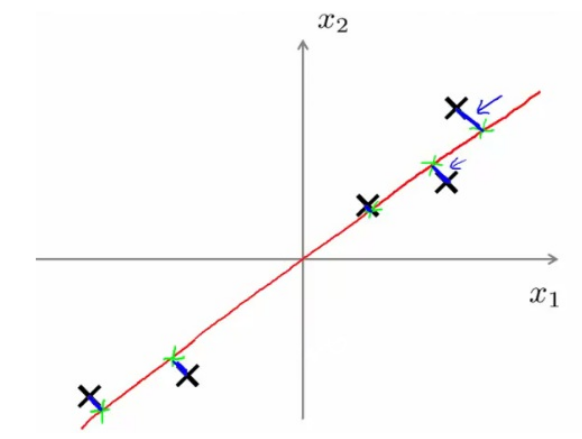

* As an aside, you should normally do mean normalization and feature scaling on your data before PCA

* A more formal description is
    * For 2D-1D, we must find a vector u (1) , which is of some dimensionality
    * Onto which you can project the data so as to minimize the projection error

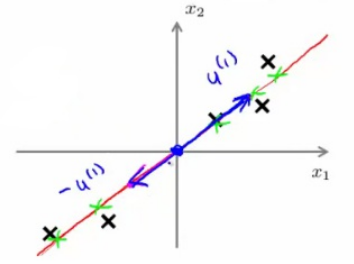

* u<sup>(1)</sup> can be positive or negative (-u<sup>(1)</sup> ) which makes no difference
    * Each of the vectors define the same red line

* In the more general case
    * To reduce from nD to kD we
        * Find k vectors (u (1) , u (2) , ... u (k) ) onto which to project the data to minimize the projection error
        * So lots of vectors onto which we project the data
        * Find a set of vectors which we project the data onto the linear subspace spanned by that set of vectors
            * We can define a point in a plane with k vectors
    * e.g. 3D->2D
        * Find pair of vectors which define a 2D plane (surface) onto which you're going to project your data
        * Much like the "shallow box" example in compression, we're trying to create the shallowest box possible (by defining two of it's three dimensions, so the box' depth is minimized)

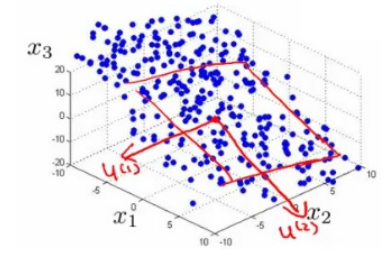

* How does PCA relate to linear regression?
    * PCA is not linear regression
        * Despite cosmetic similarities, very different
    * For linear regression, fitting a straight line to minimize the straight line between a point and a squared line
        * NB - VERTICAL distance between point
    * For PCA minimizing the magnitude of the shortest orthogonal distance
        * Gives very different effects
    * More generally
        * With linear regression we're trying to predict "y"
        * With PCA there is no "y" - instead we have a list of features and all features are treated equally
            * If we have 3D dimensional data 3D->2D
                * Have 3 features treated symmetrically

<a id='11'></a>
<h2>PCA Algorithm</h2>

* Before applying PCA must do data preprocessing
    * Given a set of m unlabeled examples we must do
        * Mean normalization
            * Replace each x<sub>j</sub><sup>i</sup> with x<sub>j</sub> - μ<sub>j</sub> ,
                * In other words, determine the mean of each feature set, and then for each feature subtract the mean from the value, so we re-scale the mean to be 0
        * Feature scaling (depending on data)
            * If features have very different scales then scale so they all have a comparable range of values
                * e.g. x<sub>j</sub><sup>i</sup> is set to (x<sub>j</sub> - μ<sub>j</sub> ) / s<sub>j</sub>
                    * Where s j is some measure of the range, so could be
                        * Biggest - smallest
                        * Standard deviation (more commonly)
* With preprocessing done, PCA finds the lower dimensional sub-space which minimizes the sum of the square
    * In summary, for 2D->1D we'd be doing something like this;

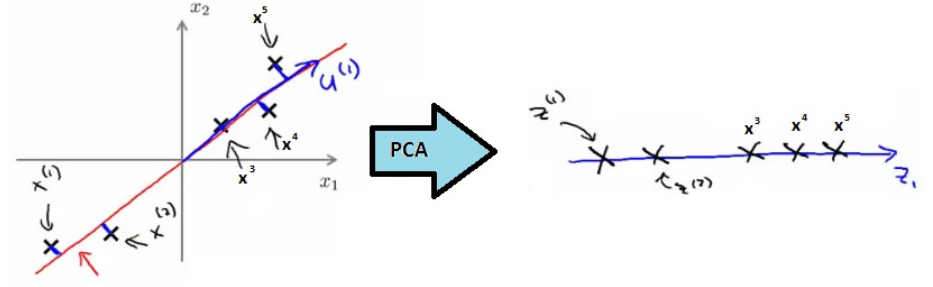

* Need to compute two things;
    * Compute the u vectors
        * The new planes
* Need to compute the z vectors
    * z vectors are the new, lower dimensionality feature vectors
* A mathematical derivation for the u vectors is very complicated
    * But once you've done it, the procedure to find each u vector is not that hard

**Algorithm Description**

* Reducing data from n-dimensional to k-dimensional
    * Compute the covariance matrix

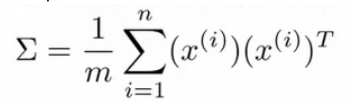

* This is commonly denoted as Σ (greek upper case sigma) - NOT summation symbol
    * Σ = sigma
        * This is an [n x n] matrix
            * Remember than x i is a [n x 1] matrix

* Compute eigenvectors of matrix Σ
    * [U,S,V] = svd(sigma)
        * svd = singular value decomposition
* U,S and V are matrices
    * U matrix is also an [n x n] matrix
    * Turns out the columns of U are the u vectors we want!
    * So to reduce a system from n-dimensions to k-dimensions
        * Just take the first k-vectors from U (first k columns)

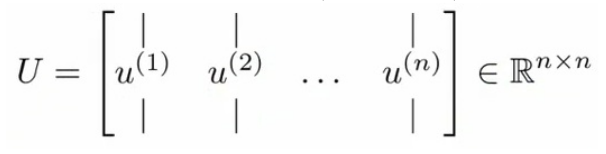

* Next we need to find some way to change x (which is n dimensional) to z (which is k dimensional)
    * reduce the dimensionality
    * Take first k columns of the u matrix and stack in columns
        * n x k matrix - call this U reduce
* We calculate z as follows
    * z = (U reduce ) T * x
        * So [k x n] * [n x 1]
        * Generates a matrix which is
             * k * 1
        * If that's not witchcraft I don't know what is!


* Exactly the same as with supervised learning except we're now doing it with unlabeled data
* So in summary
    * Preprocessing
    * Calculate sigma (covariance matrix)
    * Calculate eigenvectors with svd
    * Take k vectors from U (U reduce = U(:,1:k);)
    * Calculate z (z =U reduce ' * x;)
* No mathematical derivation
    * Very complicated
    * But it works

<a id='12'></a>
<h2>Reconstruction from Compressed Representation</h2>

* Earlier spoke about PCA as a compression algorithm
    *  If this is the case, is there a way to decompress the data from low dimensionality back to a higher dimensionality format?
* Reconstruction
    * Say we have an example as follows
    * We have our examples (x<sup>1</sup> , x<sup>2</sup> etc.)
    * Project onto z-surface
    * Given a point z<sup>1</sup> , how can we go back to the 2D space?

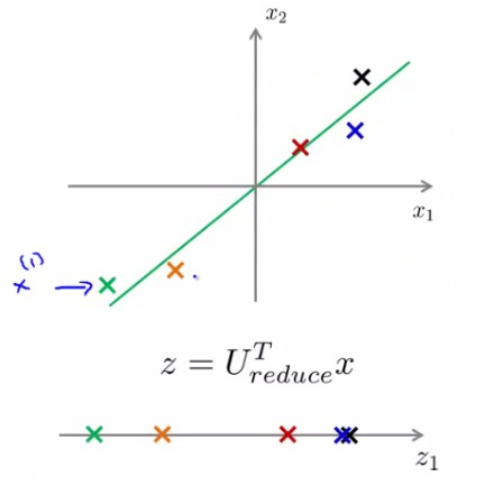

* Considering
    * z (vector) = (U reduce )<sup>T</sup> * x
* To go in the opposite direction we must do
    * x approx = U reduce * z
        * To consider dimensions (and prove this really works)
            * U reduce = [n x k]
            * z = [k * 1]
        * So
            * x approx = [n x 1]
* So this creates the following representation

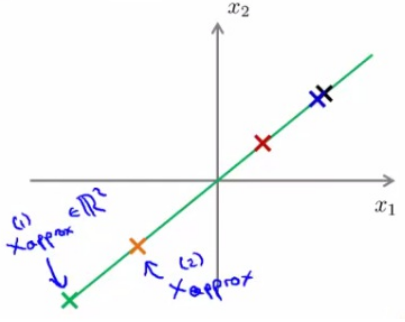

* We lose some of the information (i.e. everything is now perfectly on that line) but it is now projected into 2D space

<a id='13'></a>
<h2>Choosing the number of Principle Components</h2>

* How do we chose k ?
    * k = number of principle components
    * Guidelines about how to chose k for PCA
* To chose k think about how PCA works
     * PCA tries to minimize averaged squared projection error

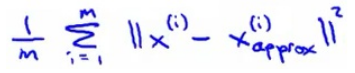

* Total variation in data can be defined as the average over data saying how far are the training examples from the origin

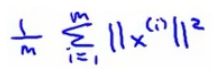

* When we're choosing k typical to use something like this

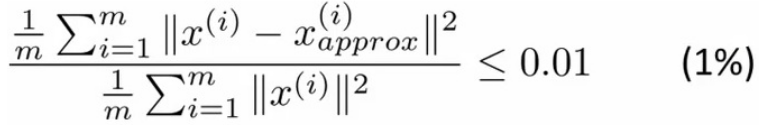

* Ratio between averaged squared projection error with total variation in data
    * Want ratio to be small - means we retain 99% of the variance
* If it's small (0) then this is because the numerator is small
    * The numerator is small when x i = x approxi
        * i.e. we lose very little information in the dimensionality reduction, so when we decompress we regenerate the same data
* So we chose k in terms of this ratio
* Often can significantly reduce data dimensionality while retaining the variance
* How do you do this

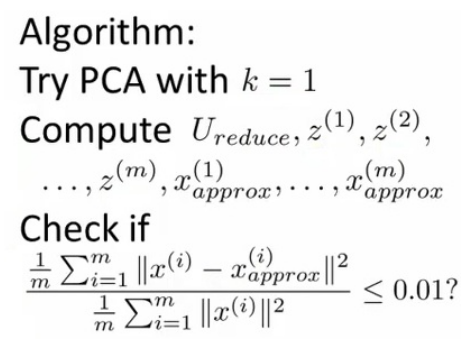

<a id='14'></a>
<h2>Advice for Applying PCA</h2>

* Can use PCA to speed up algorithm running time

**Speeding up supervised learning algorithms**

* Say you have a supervised learning problem
    * Input x and y
        * x is a 10 000 dimensional feature vector
        * e.g. 100 x 100 images = 10 000 pixels
        * Such a huge feature vector will make the algorithm slow
    * With PCA we can reduce the dimensionality and make it tractable
    * How
        
        1) Extract xs
            * So we now have an unlabeled training set
        2) Apply PCA to x vectors
            * So we now have a reduced dimensional feature vector z
        3) This gives you a new training set
            * Each vector can be re-associated with the label
        4) Take the reduced dimensionality data set and feed to a learning algorithm
            * Use y as labels and z as feature vector
        5) If you have a new example map from higher dimensionality vector to lower dimensionality vector, then feed into learning algorithm
* PCA maps one vector to a lower dimensionality vector
    * x -> z
    * Defined by PCA only on the training set
    * The mapping computes a set of parameters
        * Feature scaling values
        * U reduce
            * Parameter learned by PCA
            * Should be obtained only by determining PCA on your training set
    * So we use those learned parameters for our
        * Cross validation data
        * Test set
* Typically you can reduce data dimensionality by 5-10x without a major hit to algorithm

<a id='15'></a>
<h2>Applications of PCA</h2>

* **Compression**
    * Why
        * Reduce memory/disk needed to store data
        * Speed up learning algorithm
    * How do we chose k?
        * % of variance retained
* **Visualization**
    * Typically chose k =2 or k = 3
    * Because we can plot these values!

* One thing often done wrong regarding PCA
     * A bad use of PCA: Use it to prevent over-fitting
        * Reasoning
            * If we have x<sup>i</sup> we have n features, z<sup>i</sup> has k features which can be lower
            * If we only have k features then maybe we're less likely to over fit...
        * This doesn't work
            * BAD APPLICATION
            * Might work OK, but not a good way to address over fitting
            * Better to use regularization
        * PCA throws away some data without knowing what the values it's losing
            * Probably OK if you're keeping most of the data
            * But if you're throwing away some crucial data bad
            * So you have to go to like 95-99% variance retained
                * So here regularization will give you AT LEAST as good a way to solve over fitting
* A second PCA myth
    * Used for compression or visualization - good
    * Sometimes used
        * Design ML system with PCA from the outset
             * But, what if you did the whole thing without PCA
        * See how a system performs without PCA
            * ONLY if you have a reason to believe PCA will help should you then add PCA
        * PCA is easy enough to add on as a processing step
             * Try without first!

<a id='16'></a>
<h1>Implementation using Python</h1>

* PCA is a linear transformation that finds the "principal components", or directions of greatest variance, in a data set.
* It can be used for dimension reduction among other things.
* In this exercise we're first tasked with implementing PCA and applying it to a simple 2-dimensional data set to see how it works. 
* Let's start off by loading and visualizing the data set.

In [151]:
import numpy as np
import matplotlib.pyplot as plt    
from scipy.io import loadmat
%matplotlib inline

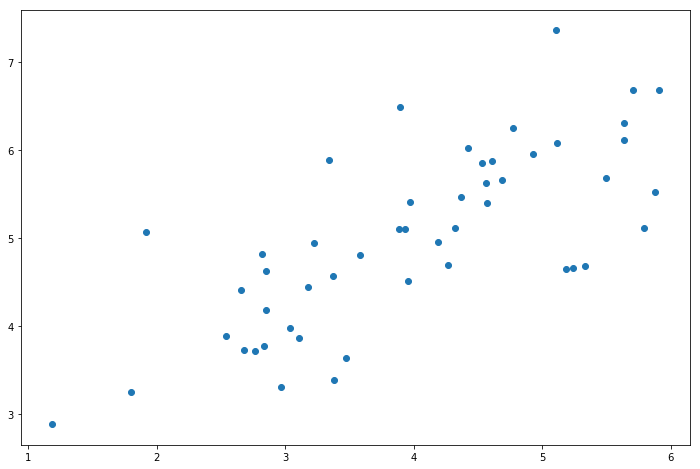

In [152]:
data = loadmat('ex7data1.mat')  
X = data['X']
fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(X[:, 0], X[:, 1])  

* The algorithm for PCA is fairly simple. 
* After ensuring that the data is normalized, the output is simply the singular value decomposition of the covariance matrix of the original data. 
* Since numpy already has built-in functions to calculate the covariance and SVD of a matrix, we'll use those rather than build from scratch.

In [153]:
def pca(X):  
    # normalize the features
    X = (X - X.mean()) / X.std()

    # compute the covariance matrix
    X = np.matrix(X)
    cov = (X.T * X) / X.shape[0]

    # perform SVD
    U, S, V = np.linalg.svd(cov)

    return U, S, V

U, S, V = pca(X)  
U, S, V

(matrix([[-0.79241747, -0.60997914],
         [-0.60997914,  0.79241747]]),
 array([1.43584536, 0.56415464]),
 matrix([[-0.79241747, -0.60997914],
         [-0.60997914,  0.79241747]]))

* Now that we have the principal components (matrix U), we can use these to project the original data into a lower-dimensional space. 
* For this task we'll implement a function that computes the projection and selects only the top K components, effectively reducing the number of dimensions.

In [154]:
def project_data(X, U, k):  
    U_reduced = U[:,:k]
    return np.dot(X, U_reduced)

Z = project_data(X, U, 1)  
Z

matrix([[-4.74689738],
        [-7.15889408],
        [-4.79563345],
        [-4.45754509],
        [-4.80263579],
        [-7.04081342],
        [-4.97025076],
        [-8.75934561],
        [-6.2232703 ],
        [-7.04497331],
        [-6.91702866],
        [-6.79543508],
        [-6.3438312 ],
        [-6.99891495],
        [-4.54558119],
        [-8.31574426],
        [-7.16920841],
        [-5.08083842],
        [-8.54077427],
        [-6.94102769],
        [-8.5978815 ],
        [-5.76620067],
        [-8.2020797 ],
        [-6.23890078],
        [-4.37943868],
        [-5.56947441],
        [-7.53865023],
        [-7.70645413],
        [-5.17158343],
        [-6.19268884],
        [-6.24385246],
        [-8.02715303],
        [-4.81235176],
        [-7.07993347],
        [-5.45953289],
        [-7.60014707],
        [-4.39612191],
        [-7.82288033],
        [-3.40498213],
        [-6.54290343],
        [-7.17879573],
        [-5.22572421],
        [-4.83081168],
        [-7

* We can also attempt to recover the original data by reversing the steps we took to project it.

In [155]:
def recover_data(Z, U, k):  
    U_reduced = U[:,:k]
    return np.dot(Z, U_reduced.T)

X_recovered = recover_data(Z, U, 1)  
X_recovered

matrix([[3.76152442, 2.89550838],
        [5.67283275, 4.36677606],
        [3.80014373, 2.92523637],
        [3.53223661, 2.71900952],
        [3.80569251, 2.92950765],
        [5.57926356, 4.29474931],
        [3.93851354, 3.03174929],
        [6.94105849, 5.3430181 ],
        [4.93142811, 3.79606507],
        [5.58255993, 4.29728676],
        [5.48117436, 4.21924319],
        [5.38482148, 4.14507365],
        [5.02696267, 3.8696047 ],
        [5.54606249, 4.26919213],
        [3.60199795, 2.77270971],
        [6.58954104, 5.07243054],
        [5.681006  , 4.37306758],
        [4.02614513, 3.09920545],
        [6.76785875, 5.20969415],
        [5.50019161, 4.2338821 ],
        [6.81311151, 5.24452836],
        [4.56923815, 3.51726213],
        [6.49947125, 5.00309752],
        [4.94381398, 3.80559934],
        [3.47034372, 2.67136624],
        [4.41334883, 3.39726321],
        [5.97375815, 4.59841938],
        [6.10672889, 4.70077626],
        [4.09805306, 3.15455801],
        [4.907

* If we then attempt to visualize the recovered data, the intuition behind how the algorithm works becomes really obvious.

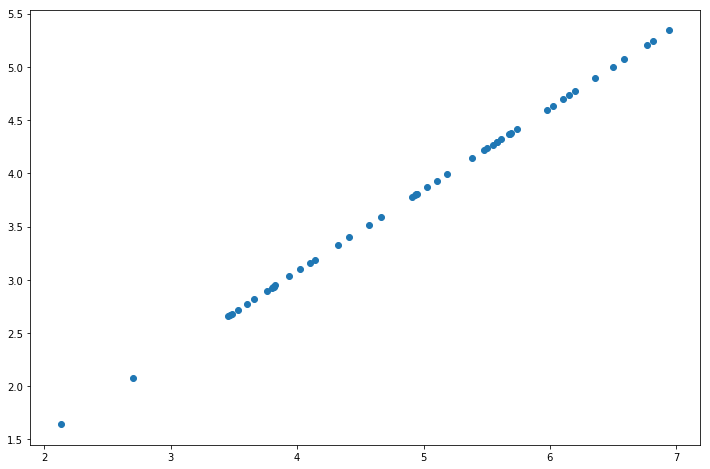

In [156]:
x = [float(i) for i in X_recovered[:,0]]
y = [float(i) for i in X_recovered[:,1]]
fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(x,y)

* Notice how the points all seem to be compressed down to an invisible line.
* That invisible line is essentially the first principal component. 
* The second principal component, which we cut off when we reduced the data to one dimension, can be thought of as the variation orthogonal to that line.
* Since we lost that information, our reconstruction can only place the points relative to the first principal component.

* As another example let us try to apply PCA to images of faces. By using the same dimension reduction techniques we can capture the "essence" of the images using much less data than the original images.

In [157]:
faces = loadmat('ex7faces.mat')  
X = faces['X']  
X.shape

(5000, 1024)

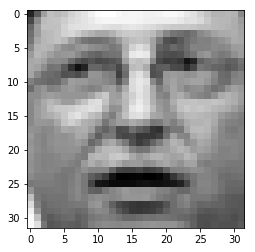

In [158]:
face = np.reshape(X[3,:], (32, 32)).T
plt.imshow(face,cmap='gray')  

* These are only 32 x 32 grayscale images though. Our next step is to run PCA on the faces data set and take the top 100 principal components.

In [159]:
U, S, V = pca(X)  
Z = project_data(X, U, 100)

* Now we can attempt to recover the original structure and render it again.

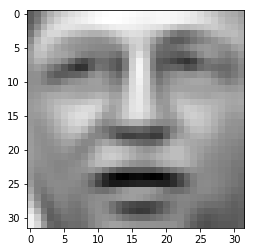

In [160]:
X_recovered = recover_data(Z, U, 100)  
face = np.reshape(X_recovered[3,:], (32, 32)).T  
plt.imshow(face,cmap='gray')

* Notice that we lost some detail, though not as much as you might expect for a 10x reduction in the number of dimensions.

<a id='17'></a>
<h1>Sci-kit learn Approach</h1>

* In this section, we will be taking the implementation approach using Scikit Learn.
* For this, we will be using Wines dataset, which will use for classfication of different types of wines.
* We will see the performance of the Model, with and without PCA

In [161]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

* Load the dataset using pandas and just explore about how the data is
* One could see that the data has 13 features i.e 13 dimensional which we cannot visualize

In [162]:
dataset = pd.read_csv('Wine.csv')
dataset.shape

(178, 14)

In [163]:
dataset.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Customer_Segment  
0   3.92     1065                 1  
1   3.40     1050                 1  
2   3.17     1185                 1  
3   3.45     1480                 1  
4   2.93      735                 1

* Now we need to split the Input Features and Target labels

In [164]:
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

* Next we need to split the dataset into Training and test sets, for this we use the scikit learn feature

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

* Next we need to scale each and every feature to a unit scale, so we use the default Standardscaler from scikit learn

In [166]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

* Now we need to create a Logistic Regression model and fit the Training data

In [167]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

* let us predict the labels for Input values in the test set and check the Model accuracy

In [168]:
y_pred = classifier.predict(X_test)

In [169]:
correct = [1 if (a == b) else 0 for (a, b) in zip(y_pred, y_test)]  
accuracy = (sum(map(int, correct)) / len(correct) * 100) 
print ('accuracy = {0}%'.format(accuracy))

accuracy = 100.0%


* Now let us apply PCA and selecting the k as 2 i.e 2dimensional

In [170]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

* let us re-run the model and check the accuracy

In [171]:
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
correct = [1 if (a == b) else 0 for (a, b) in zip(y_pred, y_test)]  
accuracy = (sum(map(int, correct)) / len(correct) * 100) 
print ('accuracy = {0}%'.format(accuracy))

accuracy = 97.22222222222221%


* Finally Visualizing the Training and test set data

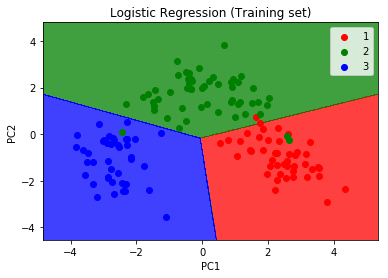

In [172]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

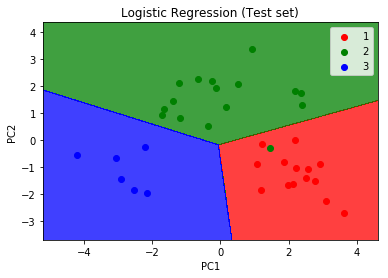

In [173]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

<a id='18'></a>
<h1>References</h1>

* https://www.coursera.org/learn/machine-learning/home/week/8
* https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/#
* https://medium.com/district-data-labs/principal-component-analysis-with-python-4962cd026465
* https://www.johnwittenauer.net/machine-learning-exercises-in-python-part-7/
* http://setosa.io/ev/principal-component-analysis/
* https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c
* https://www.analyticsvidhya.com/blog/2015/07/dimension-reduction-methods/
* https://github.com/warriorkitty/orientlens/tree/master/movielens